<a href="https://colab.research.google.com/github/shyandsy/ModernComputerVisionWithPyTorch/blob/main/chapter4_%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_summary
!pip install simple-colors
!pip install seaborn
!pip install imgaug
!pip install albumentations
!pip install kaggle
!pip install PIL

# Chapter 4: 卷积神经网络 (CNN: Convolutional Neural Network)

1. 考察传统化深度神经网络面临的问题
2. 介绍CNN工作原理
3. CNN超参: 步长,池化,滤波器
4. 用CNN以及各种数据增强技术解决传统深度神经网络准确度低的问题
5. 考察用CNN进行特征学习获得的输出结果
6. 整合技能，解决猫狗分类问题

## 4.1 考察传统化深度神经网络面临的问题
移动图片内元素，哪怕是将图片中左边第五个像素平移到右边第五个像素，图片内容并未发生变化，平移超过2个像素时，预测类别发生了变化

需要依赖chapter 3训练的模型，这里就不撸代码了

## 4.2 介绍CNN工作原理
CNN是图像领域最具突出应用的一种神经网络架构。除了用于图像分类，CNN还可以完成目标检测，图像分割，GAN等任务

#### CNN的构成模块
1. 卷积
2. 滤波器
3. 步长和填充
4. 池化




#### 4.2.1. 卷积
数学基础b站去搜，我略过

重点：
卷积核

#### 4.2.2. 滤波器
滤波器是一个权重矩阵，需要在开始时候对其进行随机初始化。网络模型通过不断增加轮数学习滤波器的最优权重值。

滤波器用于学习图像中存在的不同特征。例如某个特定滤波器可能学习到猫的耳朵特征，如果该滤波器进行卷积运算的图像中包含猫耳朵部分，就会提供高激活。

关于滤波器，需要理解2个东西
- a. 滤波器学习什么：学习特定结构的特征
- b. 如何表示滤波器：卷积核


通常，CNN模型的滤波器越多，该模型能学到的图像特征就越多。4.6中讨论各种滤波器学习的内容。

#### 4.2.3. 步长和填充
什么是步长？卷积算子每次移动的单元数

比如，步长2

$$
\begin{array}{c@{\quad}c}
\text{Input Matrix} &
\text{Convolution} &
\text{Kernel Matrix} &
\text{=} &
\text{Convolution Result} \\
\begin{bmatrix}
{\color{red}{1}} & {\color{red}{2}} & {\color{green}{3}} & {\color{green}{4}} \\
{\color{red}{5}} & {\color{red}{6}} & {\color{green}{7}} & {\color{green}{8}} \\
{\color{purple}{9}} & {\color{purple}{10}} & {\color{yellow}{11}} & {\color{yellow}{12}} \\
{\color{purple}{13}} & {\color{purple}{14}} & {\color{yellow}{15}} & {\color{yellow}{16}} \\
\end{bmatrix}
& \circledast
&
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
&
=
&
\begin{bmatrix}
{\color{red}{44}} & {\color{green}{64}} \\
{\color{purple}{124}} & {\color{yellow}{144}}
\end{bmatrix}
\end{array}
$$


什么填充？

2*2卷积核，步长1，作用在4*4矩阵上，得到3*3矩阵;2*2卷积核，步长2，作用在4*4矩阵上，得到2*2矩阵，和原来矩阵大小不一致。
另外，无法对矩阵最后一列进行任何操作。怎么办？填充0啊

$$
\begin{array}{c@{\quad}c}
\text{Original Matrix} &
\text{ => } &
\text{Padding Matrix} \\
\begin{bmatrix}
1 & 2 & 3 & 4 & \\
5 & 6 & 7 & 8 & \\
9 & 10 & 11 & 12 & \\
13 & 14 & 15 & 16 \\
\end{bmatrix}
& =>
&
\begin{bmatrix}
{\color{red}{0}} & {\color{red}{0}} & {\color{red}{0}} & {\color{red}{0}} & {\color{red}{0}} & {\color{red}{0}} \\
{\color{red}{0}} & 1 & 2 & 3 & 4 & {\color{red}{0}}\\
{\color{red}{0}} & 5 & 6 & 7 & 8 & {\color{red}{0}}\\
{\color{red}{0}} & 9 & 10 & 11 & 12 & {\color{red}{0}}\\
{\color{red}{0}} & 13 & 14 & 15 & 16 & {\color{red}{0}}\\
{\color{red}{0}} & {\color{red}{0}} & {\color{red}{0}} & {\color{red}{0}} & {\color{red}{0}} & {\color{red}{0}} \\
\end{bmatrix}
\end{array}
$$


#### 4.2.4. 池化
将信息聚集在一个小块上，比如最大迟化

假设迟化步长2

$$
\begin{array}{c@{\quad}c}
\text{Convolution Result} &
\text{Pooling} &
\text{Result} \\
\begin{bmatrix}
{\color{red}{1}} & {\color{red}{2}} & {\color{green}{3}} & {\color{green}{4}} \\
{\color{red}{5}} & {\color{red}{6}} & {\color{green}{7}} & {\color{green}{8}} \\
{\color{purple}{9}} & {\color{purple}{10}} & {\color{yellow}{11}} & {\color{yellow}{12}} \\
{\color{purple}{13}} & {\color{purple}{14}} & {\color{yellow}{15}} & {\color{yellow}{16}} \\
\end{bmatrix}
&
Flatten
&
\begin{bmatrix}
{\color{red}{6}} & {\color{green}{8}} \\
{\color{purple}{14}} & {\color{yellow}{16}}
\end{bmatrix}
\end{array}
$$

#### 4.2.5.整合各个构建模块


迟化层输出经过扁平层扁平层,扁平层可以等效于输出层。一旦得到了扁平层的值，我们就可以把他传过隐藏层，得到输出，用于预测图像的类别。

$$
\begin{array}{c@{\quad}c}
\text{Pooling Result} &
\text{Flatten} &
\text{Result} \\
\begin{bmatrix}
{\color{red}{6}} & {\color{green}{8}} \\
{\color{purple}{14}} & {\color{yellow}{16}}
\end{bmatrix}
&
\text{Flatten 扁平化}
&
\begin{bmatrix}
{\color{red}{6}} & {\color{green}{8}} &
{\color{purple}{14}} & {\color{yellow}{16}}
\end{bmatrix}
\end{array}
$$

#### 4.2.6. 卷积和池化的图像平移不变性原理
当我们执行池化运算时，可以把该运算的输出看作是对某个区域的一种抽象。尤其在处理图像平移时，这很有用。

处理感受野。对100*100尺寸图片进行2此卷积和池化运算，得到25*25结果数据(padding后卷积还是100*100，2次2d pooling将其变为25*@5)。这25*25个数据，每一个都代表原图4*4的部份。因此，对于卷积和池化运算，结果中每一个元素对应原图中一小块。

## 4.3 实现CNN
我们已经知道CNN由卷积，池化，扁平化，和最后分类层组成。本节，学习CNN在向前传播过程中各中运算的代码

#### 4.3.1 使用pytorch构建基于CNN的架构

In [2]:
import numpy as np
import matplotlib.pyplot
import torch
from torch import nn
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch.optim import SGD, Adam
%matplotlib inline
from torchsummary import summary

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available() else 'cpu'

# define model
def get_model():
  model = nn.Sequential(
      #input channel=1，output channel=1, kernel size 3
      nn.Conv2d(1,1, kernel_size=3),
      # choose max value in 2*2 area
      nn.MaxPool2d(2),
      nn.ReLU(),
      nn.Flatten(),
      nn.Linear(1,1),
      nn.Sigmoid(),
  ).to(device)
  loss_fn = nn.BCELoss()
  optimizer = Adam(model.parameters(), lr=1e-3)
  return model, loss_fn, optimizer

def train_batch(x, y, model, optimizer, loss_fn):
  model.train()
  prediction = model(x)
  #print(f'x = {x}, x shape={x.shape}')
  #print(f'prediction={prediction} prediction shape={prediction.shape}')
  batch_loss = loss_fn(prediction.squeeze(0), y)
  #print(f'prediction.squeeze(0)={prediction.squeeze(0)} prediction shape={prediction.squeeze(0).shape}')
  #print(f'batch_loss={batch_loss} shape={batch_loss.shape}\n')
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

# dataset
X_train = torch.tensor([
    [[[1,2,3,4],[2,3,4,5],[5,6,7,8],[1,3,4,5]]],
    [[[-1,2,3,-4],[2,-3,4,5],[-5,6,-7,8],[-1,-3,-4,-5]]],
]).to(device).float()
X_train /= 8
y_train = torch.tensor([0,1]).to(device).float()

print(f'X_train shape : {X_train.shape}')

model, loss_fn, optimizer = get_model()
summary(model, X_train.shape[1:])

trn_dl = DataLoader(TensorDataset(X_train, y_train))

for epoch in range(2000):
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)




X_train shape : torch.Size([2, 1, 4, 4])
Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 1, 2, 2]             10
├─MaxPool2d: 1-2                         [-1, 1, 1, 1]             --
├─ReLU: 1-3                              [-1, 1, 1, 1]             --
├─Flatten: 1-4                           [-1, 1]                   --
├─Linear: 1-5                            [-1, 1]                   2
├─Sigmoid: 1-6                           [-1, 1]                   --
Total params: 12
Trainable params: 12
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


#### 4.3.2 深入理解前向传播
帮助理解工作原理，现实操作中不用这么干

此处踩了几个坑
1. 卷积计算完之后，在去加bias(我傻了,这个错误有点离谱)。正确做法：torch.sum(img_subset * model_filter) + cnn_b
2. 不要画蛇添足使用torch.float64。因为torch内部使用float32，因此如果在手动计算过程中使用float64，会产生误差

In [3]:
from torch.nn import functional as F # torch library

torch.set_printoptions(precision=10)
torch.set_default_dtype(torch.float32)

def double_check_cnn_result(cnn_w, cnn_b, X_train, img_subsets):
  w = cnn_w[0, 0, :, :]
  b = cnn_b

  print("---------------------------------")
  print("double check")

  print(f"convolution kernel: {w}, {w.shape}")
  print(f"convolution bias: {b}, {b.shape}")
  #b = -0.1945

  result_dim = X_train[0, 0].shape[0] - w.shape[0] + 1
  print(f"result dim: {result_dim}")
  result = torch.zeros((result_dim,result_dim))
  result = result.to(device)
  print(f"result: {result}")
  for index, img_subset in enumerate(img_subsets):
    row = index // result_dim
    col = index % result_dim
    r = 0
    #print(f"\nimg subset: {img_subset}\n")
    for i in range(img_subset.shape[0]):
      for j in range(img_subset.shape[1]):
        result[row, col] += img_subset[i][j] * w[i][j]
    print(f"result[row, col] = {result[row, col]}")
    result[row, col] += b.squeeze()
    #print(f"val = {result[row, col]}")
      #r += cnn_b[0]
  print(f"\ndouble check: ===> !!!cnn result: {result}")
  print("---------------------------------")

print("******************************************************")
print("Model Structure:")
list(model.children())
print("******************************************************")
print("Target:")
print(f"X_train[:1] value {X_train[:1]}")
print(f"X_train[:1] shape {X_train[:1].shape}")
answer = model(X_train[:1])
print(f'model(X_train[:1]) = {answer}')
print("******************************************************")
print("Model Parameters:")
"""
[
  Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1)),
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
  ReLU(),
  Flatten(start_dim=1, end_dim=-1),
  Linear(in_features=1, out_features=1, bias=True),
  Sigmoid()
]
"""

# get all weight related layers
(cnn_w, cnn_b), (lin_w, lin_b) = [
    (layer.weight.data, layer.bias.data)
    for layer in list(model.children()) if hasattr(layer, 'weight')
]
# convolution
# - kernel 1(batch)*1(channel)*3*3,
# - b is 1
print(f'cnn: w = {cnn_w}, b = {cnn_b}, dtype=({cnn_w.dtype},{cnn_b.dtype})')
print(f'lin: w = {lin_w}, b={lin_b}, dtype=({lin_w.dtype},{lin_b.dtype})')
print(f'data[0,0] = {X_train[0, 0]}')
model_filter = cnn_w.reshape(3,3)
print("model_filter = cnn_w.reshape(3,3): ", model_filter)
print("******************************************************\n")

******************************************************
Model Structure:
******************************************************
Target:
X_train[:1] value tensor([[[[0.1250000000, 0.2500000000, 0.3750000000, 0.5000000000],
          [0.2500000000, 0.3750000000, 0.5000000000, 0.6250000000],
          [0.6250000000, 0.7500000000, 0.8750000000, 1.0000000000],
          [0.1250000000, 0.3750000000, 0.5000000000, 0.6250000000]]]],
       device='cuda:0')
X_train[:1] shape torch.Size([1, 1, 4, 4])
model(X_train[:1]) = tensor([[0.1194258332]], device='cuda:0', grad_fn=<SigmoidBackward0>)
******************************************************
Model Parameters:
cnn: w = tensor([[[[ 0.7789958715,  0.1666657925, -1.3199414015],
          [-1.3618037701,  0.3845965564,  0.4543077648],
          [ 0.6175318956, -0.9785978794,  0.4852317274]]]], device='cuda:0'), b = tensor([0.2431262136], device='cuda:0'), dtype=(torch.float32,torch.float32)
lin: w = tensor([[1.9568369389]], device='cuda:0'), b=tenso

In [4]:
import simple_colors
import math

print(f"\n1. Convolution ==================")

"""
convolution for input
1. dimension for 1 input
2. create zero matrix
3. dont forget add bias after cobvolution
torch.sum(img_subset * model_filter) + cnn_b
"""
# 1. dimension for 1 input
h_im, w_im = X_train.shape[2:]
h_conv, w_conv = cnn_w.shape[2:]
print(f'X_train.shape = {X_train.shape}')
print(f'h_im = {h_im}, w_im = {w_im}')
print(f'h_conv = {h_conv}, w_conv = {w_conv}')

# 2. create 0 matrix:
# convolution step 1 result=> h_im - h_conv + 1
sumprod = torch.zeros((h_im-h_conv+1, w_im-w_conv+1))
img_subsets = []
for i in range(h_im - h_conv + 1):
  for j in range(w_im - w_conv + 1):
    img_subset = X_train[0, 0, i:(i+3), j:(j+3)]
    img_subset = img_subset.reshape(3,3)
    img_subsets.append(img_subset)
    print("img_subset: ", img_subset)

    val = torch.sum(img_subset * model_filter) + cnn_b
    sumprod[i, j] = val

print(simple_colors.red(f"\n\tConvolution Result: {sumprod}\n"))

# double check result
double_check_cnn_result(cnn_w, cnn_b, X_train, img_subsets)

print(f"\n2. Pooling==================")
print(f"max pooling, sumprod {sumprod}, shape {sumprod.shape}")
pooling_result = torch.max(sumprod)
print(simple_colors.red(f"\n\tMax Pooling Result = {pooling_result}"))

print(f"\n2. ReLU==================")
print("operation: min(0, x)")
relu_result = pooling_result.clamp_min(0)
print(simple_colors.red(f"\n\tReLU resulut: {relu_result}"))

print(f"\n4. Flatten==================")
print("Flatten on 1 dimension, do nothing")
flatten_result = relu_result
print(simple_colors.red(f"\n\tFlatten Result = {flatten_result}"))

print(f"\n5. Linear==================")
print("Linear wx+b")
linear_result = flatten_result * lin_w + lin_b
print(simple_colors.red(f"\n\tFlatten Result = {linear_result}"))

print(f"\n6. Sigmoid==================")
print("Sigmoid")
final_result = F.sigmoid(linear_result)
print(simple_colors.red(f"\n\tFinal Result = {final_result}"))

print(simple_colors.red(f"\n\tReal Answer = {answer}"))

err = math.fabs(answer-final_result)
if err < 1e-6:
  print(simple_colors.green(f"Correct, err = {err}"))
else:
  print(simple_colors.red("Incorrect"))


1. Convolution ==================
X_train.shape = torch.Size([2, 1, 4, 4])
h_im = 4, w_im = 4
h_conv = 3, w_conv = 3
img_subset:  tensor([[0.1250000000, 0.2500000000, 0.3750000000],
        [0.2500000000, 0.3750000000, 0.5000000000],
        [0.6250000000, 0.7500000000, 0.8750000000]], device='cuda:0')
img_subset:  tensor([[0.2500000000, 0.3750000000, 0.5000000000],
        [0.3750000000, 0.5000000000, 0.6250000000],
        [0.7500000000, 0.8750000000, 1.0000000000]], device='cuda:0')
img_subset:  tensor([[0.2500000000, 0.3750000000, 0.5000000000],
        [0.6250000000, 0.7500000000, 0.8750000000],
        [0.1250000000, 0.3750000000, 0.5000000000]], device='cuda:0')
img_subset:  tensor([[0.3750000000, 0.5000000000, 0.6250000000],
        [0.7500000000, 0.8750000000, 1.0000000000],
        [0.3750000000, 0.5000000000, 0.6250000000]], device='cuda:0')

	Convolution Result: tensor([[-0.0052974224, -0.1019241512],
        [-0.3719234467, -0.3913583755]])

------------------------------

## 4.4 用深度CNN分类图像

实验，尝试对比正则化和epochs带来的影响

结论: 看起来有无正则化，epoches=5 or 10，都没有什么卵用

|调整点|epoch|验证集准确率|
|:----:|:----:|:----:|
|无正则化|5|91.16%|
|无正则化|10|91.21%|
|正则:Dropout(0.3)|5|90.84%|
|正则:Dropout(0.3)|10|91.2%|
|正则:Dropout(0.5)|5|91.14%|
|正则:Dropout(0.5)|10|91.33%|


In [5]:
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker
%matplotlib inline


device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available() else 'cpu'
print(f'device = {device}')

# 5,
def show(epoches, train_losses, val_losses, train_accuracies, val_accurarcies):
  print(f"train losses: {train_losses}")
  print(f"val losses: {val_losses}")
  print(f"train accuracies: {train_accuracies}")
  print(f"val accurarcies: {val_accurarcies}")
  epochs = np.arange(epoches)+1
  plt.subplot(211)
  plt.plot(epochs, train_losses, 'bo', label='Training loss')
  plt.plot(epochs, val_losses, 'r', label='Validation loss')
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.title('Training and validation loss with CNN')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid('off')
  plt.show()
  plt.subplot(212)
  plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accurarcies, 'r', label='Validation accuracy')
  plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
  plt.title('Training and validation accuracy with CNN')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  #plt.ylim(0.8,1)
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
  plt.legend()
  plt.grid('off')
  plt.show()

device = cuda


#### 4.4.1 准备数据FMNIST

In [6]:
data_folder = './data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

print()
print(f"tr_images shape: {tr_images.shape}")
print(f"tr_targets shape: {tr_targets.shape}")
print(f"val_images shape: {val_images.shape}")
print(f"val_targets shape: {val_targets.shape}")


tr_images shape: torch.Size([60000, 28, 28])
tr_targets shape: torch.Size([60000])
val_images shape: torch.Size([10000, 28, 28])
val_targets shape: torch.Size([10000])


#### 4.4.2 定义数据集类

In [7]:
class FMNISTDataset(Dataset):
  def __init__(self, x, y):
    x = x.float()/255.0
    print(f"x original shape: {x.shape}")
    """转换为训练需要的数据格式
    -1	batch_size	自动计算批次大小（根据原始元素个数推导）
    1	channels	图像通道数，这里是灰度图像，所以是 1
    28	height	图像高度为 28 像素
    28	width	图像宽度为 28 像素
    """
    x = x.view(-1, 1, 28, 28)
    print(f"x.view(-1, 1, 28, 28) shape: {x.shape}")
    self.x = x
    self.y = y
  def __getitem__(self, ix):
    x, y = self.x[ix], self.y[ix]
    return x.to(device), y.to(device)
  def __len__(self):
    return len(self.x)

#### 4.4.3 定义模型

In [8]:
def get_model():
  model = nn.Sequential(
    # in_channels	  1	    输入图像的通道数（灰度图为 1，RGB 图为 3）
    # out_channels	64	  这个卷积层有 64 个卷积核，每个核会产生一张输出特征图
    # kernel_size	  3	    卷积核大小是 64*3×3， 输出64个通道
    # 输入图像尺寸    28*28
    # 因此输出的每个特征图尺寸是  28-3+1,(26*26)
    nn.Conv2d(1, 64, kernel_size=3), # 输出64个通道(特征图), (64,26,26)
    nn.MaxPool2d(2),                 # (64*26*26) => (64*13*13)
    nn.ReLU(),                       # (64*13*13) => (64*13*13)

    # in_channels	  64	  由上一个卷积给出64个通道(特征图)
    # out_channels	128	  这个卷积层有 128 个卷积核，每个核会产生一张输出特征图
    # kernel_size	  3	    卷积核大小是 128*3×3，输出128个通道
    # 输入图像尺寸    (13*13)
    # 因此输出的每个特征图尺寸是13-3+1,(128*11*11)
    nn.Conv2d(64, 128, kernel_size=3), # 输出128个通道(特征图)，(128*11*11)
    nn.MaxPool2d(2),                   # /2 向下区整 (128*5*5)
    nn.ReLU(),                         # (128*5*5)

    #拉平
    nn.Flatten(),                     #128 * (5*5) => (3200)

    # 线性激活
    # 输入:       n*3200
    # 输出:       (n,3200) * (3200,256) = (n*256)
    nn.Linear(3200, 256),
    nn.ReLU(),

    # 线性激活
    # 输入:       n*256
    # 输出:       (n,256) * (256,10) = (n*256) 10个分类
    nn.Linear(256, 10),

    # 正则
    nn.Dropout(0.3),
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = Adam(model.parameters(), lr=1e-3)
  return model, loss_fn, optimizer



In [9]:
def train_batch(x, y, mode, optimizer, loss_fn):
  prediction = model(x)
  batch_loss = loss_fn(prediction, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
  model.eval()
  prediction = model(x)
  max_values, argmaxes = prediction.max(-1)
  is_correct = argmaxes == y
  return is_correct.cpu().numpy().tolist()

def get_data():
  train = FMNISTDataset(tr_images, tr_targets)
  tr_dl = DataLoader(train, batch_size=32, shuffle=True)
  val = FMNISTDataset(val_images, val_targets)
  val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
  return tr_dl, val_dl

@torch.no_grad()
def val_loss(x, y, model):
  model.eval()
  prediction = model(x)
  val_loss = loss_fn(prediction, y)
  return val_loss.item()


#### 4.4.4 训练观察结果

x original shape: torch.Size([60000, 28, 28])
x.view(-1, 1, 28, 28) shape: torch.Size([60000, 1, 28, 28])
x original shape: torch.Size([10000, 28, 28])
x.view(-1, 1, 28, 28) shape: torch.Size([10000, 1, 28, 28])
Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            640
├─MaxPool2d: 1-2                         --
├─ReLU: 1-3                              --
├─Conv2d: 1-4                            73,856
├─MaxPool2d: 1-5                         --
├─ReLU: 1-6                              --
├─Flatten: 1-7                           --
├─Linear: 1-8                            819,456
├─ReLU: 1-9                              --
├─Linear: 1-10                           2,570
├─Dropout: 1-11                          --
Total params: 896,522
Trainable params: 896,522
Non-trainable params: 0
epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8
epoch = 9
train losses: [np.float64(0.4370230876604716), np.float64(0.2824401803

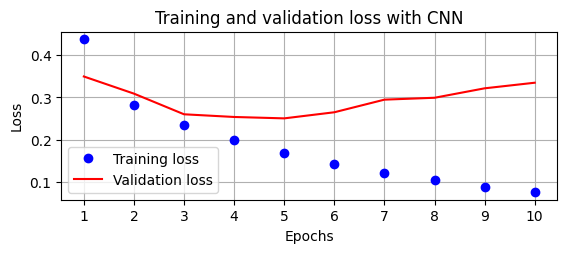

/tmp/ipython-input-5-1312539093.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


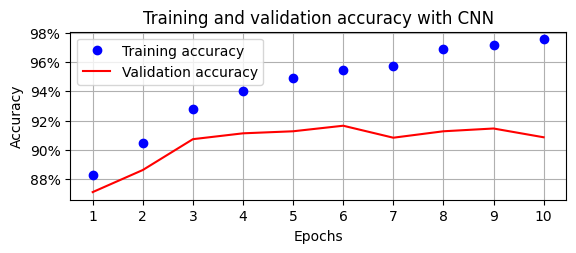

In [10]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()
summary(model, input_size=(1,28,28))

epoches = 10

train_losses, train_accuracies = [], []
val_losses, val_accurarcies = [], []
for epoch in range(epoches):
  print(f"epoch = {epoch}")
  train_epoch_losses, train_epoch_accuracies = [], []
  for ix, batch in enumerate(trn_dl):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)
    train_epoch_losses.append(batch_loss)
  train_epoch_loss = np.array(train_epoch_losses).mean()

  for ix, batch in enumerate(trn_dl):
    x, y = batch
    is_correct = accuracy(x, y, model)
    train_epoch_accuracies.extend(is_correct)
  train_epoch_accuracy = np.mean(train_epoch_accuracies)

  for ix, batch in enumerate(val_dl):
    x, y = batch
    val_is_correct = accuracy(x, y, model)
    validation_loss = val_loss(x, y, model)
    train_epoch_accuracies.extend(is_correct)
  val_epoch_accuracy = np.mean(val_is_correct)

  train_losses.append(train_epoch_loss)
  train_accuracies.append(train_epoch_accuracy)
  val_losses.append(validation_loss)
  val_accurarcies.append(val_epoch_accuracy)


show(epoches, train_losses, val_losses, train_accuracies, val_accurarcies)

#### 4.4.5 看看dropout到底做了什么？

1. 每个元素有 30% 概率被置为 0
2. (1-0.3)=0.7概率被保留;如果保留，则会
$$x = \frac{x}{1-0.3}$$

In [11]:
x = torch.tensor([1.0, 1.0, 1.0, 1.0])
dropout = nn.Dropout(0.3)
dropout.train()  # 启用训练模式
output = dropout(x)
print(output)

x = torch.tensor([1.0, 1.0, 1.0, 1.0])
dropout = nn.Dropout(0.3)
dropout.train()  # 启用训练模式
output = dropout(x)
print(output)

tensor([0.0000000000, 1.4285714626, 1.4285714626, 1.4285714626])
tensor([1.4285714626, 1.4285714626, 1.4285714626, 0.0000000000])


#### 4.4.6 如果图像平移4个像素，结果如何

把图像从-5像素平移到+5像素，预测他们的类别

实验结论

1. 左右平移+-4个像素，结果都没有问题
2. 当平移达到+-5像素时候，正确概率大大降低

CNN有助于解决像素平移问题，但并没有完全解决。需要后面***数据增强***技术来解决这个问题

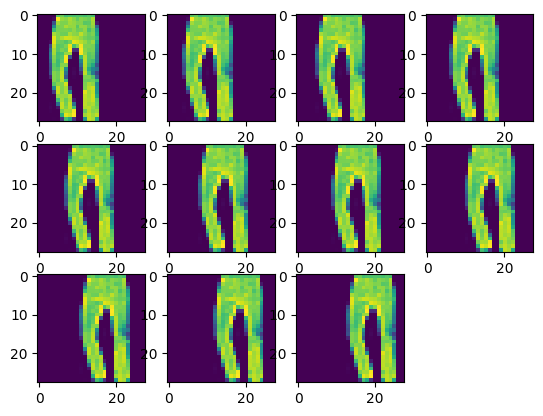

<Axes: title={'center': 'probability of each class for variaous translations'}>

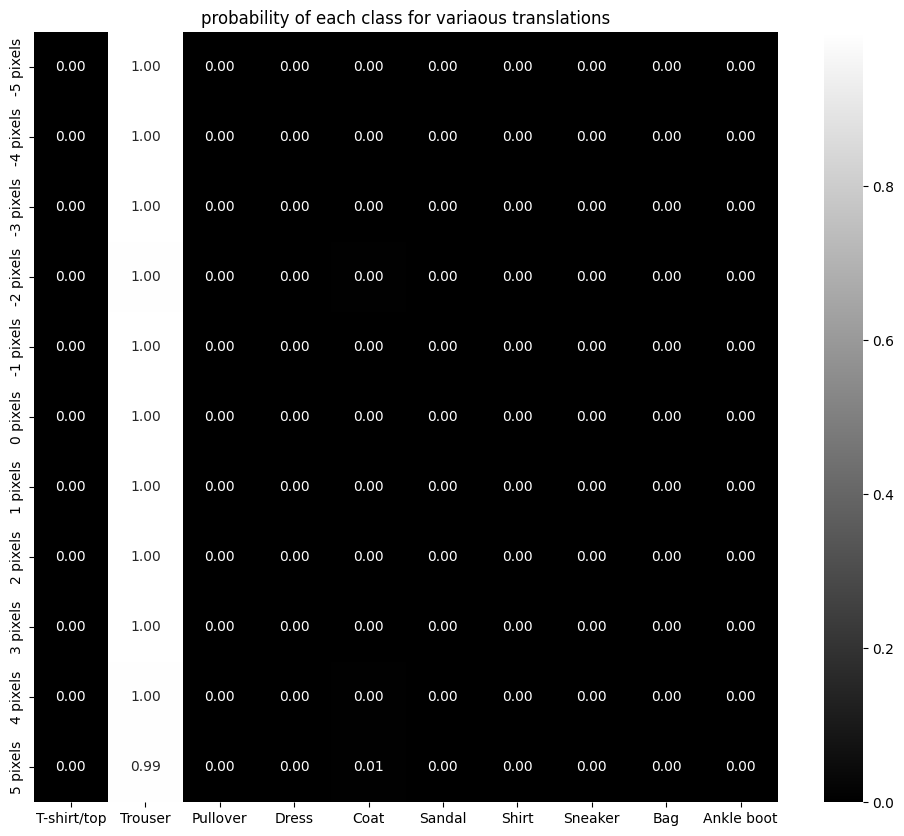

In [38]:
import seaborn as sns
import numpy as np

preds = []

# 选一张图
img = tr_images[24300]

img = img/255.0   # 缩放
img = img.view(28,28) # 改变shape

# 调整图片做预测
total = 6-(-5)
for i, px in enumerate(range(-5,6)):
  row = total // 4
  col = total % 4
  plt.subplot(row+ 1, col + 1, i+1)

  img2 = np.roll(img, px, axis=1) # 横向移动
  plt.imshow(img2)

  img3 = torch.Tensor(img2).view(-1,1,28,28).to(device)
  np_output = model(img3).cpu().detach().numpy()
  #print(f"px = {px}, np_output = {np_output}")

  # 归一化: 所有数都被归一化到 [0,1] 之间,加起来正好是1
  # softmax，得到每个类别的概率
  output = np.exp(np_output)/np.sum(np.exp(np_output))
  #print(f"px = {px}, softmax output = {output}")

  preds.append(output)
plt.show()

# 可视化
fig, ax = plt.subplots(1,1,figsize=(12,10))
plt.title("probability of each class for variaous translations")
sns.heatmap(np.array(preds).reshape(11,10), annot=True, ax=ax, fmt='.2f', xticklabels=fmnist.classes, yticklabels=[str(i)+str(' pixels') for i in range(-5,6)], cmap='gray')


## 4.5 实现数据增强
1. 轻微的旋转
2. 放图缩小
3. 包含一些噪声
4. 亮度较低
5. 图像翻转
6. 图像被剪切

imgaug 已经多年没有活跃维护，官方推荐 使用 albumentations 替代

改用albumentations吧



#### 4.5.1 albumentations图片缩放 - 缩放，移动，旋转



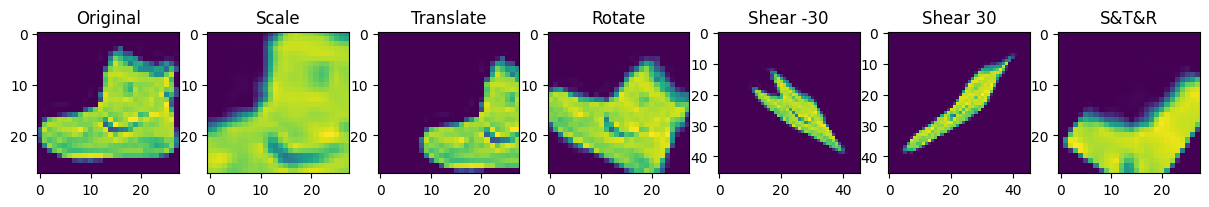

In [80]:
import albumentations as A
from albumentations.augmentations.geometric.transforms import Affine

plt.figure(figsize=(15, 5), dpi=100)

# 原图
plt.subplot(1,7,1)
plt.title("Original")
img = tr_images[0].numpy().squeeze()
plt.imshow(img)

# 缩放对象
t1 = A.Compose([
    Affine(scale=2.0, p=1.0)  # 缩放为 2 倍
])
# 平移
t2 = A.Compose([
    Affine(translate_px={'x': 8, 'y': 2}, p=1.0)
])
# 旋转
t3 = A.Compose([
    A.Rotate(limit=45, p=1.0)
])
#剪切 -30"
t4 = A.Compose([
    Affine(shear=-30, fit_output=True, p=1.0)
])
#剪切 30
t5 = A.Compose([
    Affine(shear=30, fit_output=True, p=1.0)
])
# 综合
t6 = A.Compose([
    Affine(scale=2.0, p=1.0),  # 缩放为 2 倍
    Affine(translate_px={'x': 8, 'y': 2}, p=1.0), # tranlate
    A.Rotate(limit=45, p=1.0),
    #Affine(shear=30, fit_output=True, p=1.0)
])
titles = ["Scale", "Translate", "Rotate", "Shear -30", "Shear 30", "S&T&R"]
ts = [t1, t2, t3, t4, t5, t6]


for i, (title, transform) in enumerate(zip(titles, ts)):
  plt.subplot(1,len(ts)+1,i+2)
  plt.title(title)
  augmented = transform(image=img)
  plt.imshow(augmented["image"])
plt.show()


#### 4.5.2 albumentations亮度，对比度调整

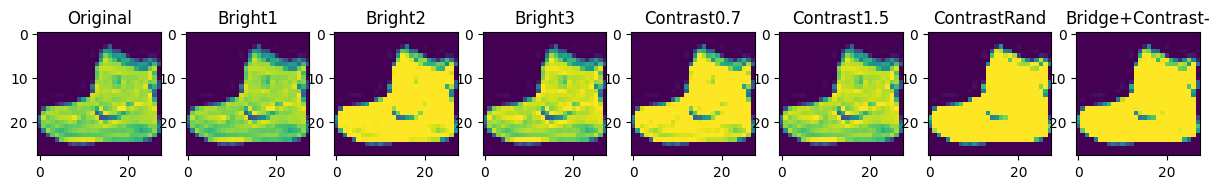

In [81]:
plt.figure(figsize=(15, 5), dpi=100)

# 亮度1
t1 = A.Compose([
    A.RandomGamma(
        gamma_limit=(80, 120),  # 值>100时增亮
        p=0.7
    )
])
# 亮度2
t2 = A.Compose([
    A.RandomBrightnessContrast(
        brightness_limit=(0.1, 0.5),  # 亮度增强范围（0.1~0.5倍）
        contrast_limit=0,             # 对比度不变
        brightness_by_max=True,      # 基于最大像素值调整亮度
        p=1.0                        # 必定应用
    )
])
# 亮度3
t3 = A.Compose([
    A.HueSaturationValue(
        hue_shift_limit=0,      # 色调不变
        sat_shift_limit=0,      # 饱和度不变
        val_shift_limit=(10, 30),  # 明度增加10~30
        p=0.8
    )
])
# 降低对比度降低0.7
t4 = A.Compose([
    A.RandomBrightnessContrast(
        contrast_limit=0.5,   # 对比度调整范围（0.5~1.5倍）
        brightness_limit=0,   # 禁用亮度调整
        p=1.0
    ),
])
# 降低对比度提升1.5
t5 = A.Compose([
    A.RandomBrightnessContrast(
        contrast_limit=1.5,   # 对比度调整范围（0.5~1.5倍）
        brightness_limit=0,   # 禁用亮度调整
        p=1.0
    )
])
# 降低对比度调整(0.5,1.5)
t6 = A.Compose([
    A.RandomBrightnessContrast(
        contrast_limit=(0.5,1.5),   # 对比度调整范围（0.5~1.5倍）
        brightness_limit=0,         # 禁用亮度调整
        p=1.0
    )
])
t7 = A.Compose([
    A.RandomBrightnessContrast(
        brightness_limit=(0.2, 0.5),  # 亮度提升20%-50%（背景变亮）
        contrast_limit=(-0.3, -0.1),  # 对比度降低10%-30%（前景变暗）
        p=1.0
    )
])

titles = ["Bright1", "Bright2", "Bright3", "Contrast0.7", "Contrast1.5", "ContrastRand", "Bridge+Contrast-"]
ts = [t1, t2, t3, t4, t5, t6, t7]

# 原图
plt.subplot(1,len(ts)+1,1)
plt.title("Original")
img = tr_images[0].numpy().squeeze()
plt.imshow(img)

for i, (title, transform) in enumerate(zip(titles, ts)):
  plt.subplot(1,len(ts)+1,i+2)
  plt.title(title)
  augmented = transform(image=img)
  plt.imshow(augmented["image"])
plt.show()


#### 4.5.3 albumentations图片模糊

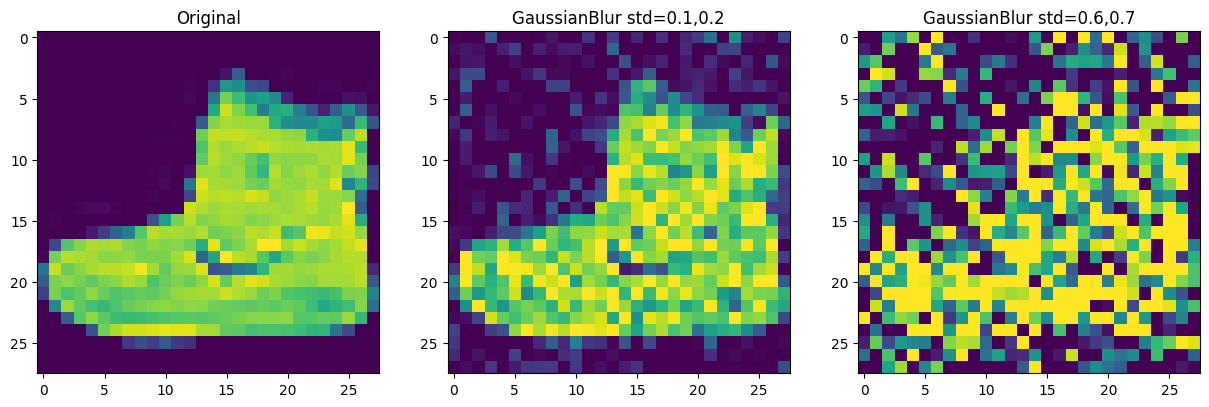

In [95]:
plt.figure(figsize=(15, 5), dpi=100)


# 高斯噪声使得图片变模糊
t1 = A.Compose([
    A.GaussNoise(std_range=(0.1, 0.2), p=1)  # 噪声方差1，应用概率1
])
t2= A.Compose([
    A.GaussNoise(std_range=(0.6, 0.7), p=1)  # 噪声方差范围10.0~50.0，应用概率1
])

titles = ["GaussianBlur std=0.1,0.2", "GaussianBlur std=0.6,0.7"]
ts = [t1, t2]

# 原图
plt.subplot(1,len(ts)+1,1)
plt.title("Original")
img = tr_images[0].numpy().squeeze()
plt.imshow(img)

for i, (title, transform) in enumerate(zip(titles, ts)):
  plt.subplot(1,len(ts)+1,i+2)
  plt.title(title)
  augmented = transform(image=img)
  plt.imshow(augmented["image"])
plt.show()


#### 4.5.4 用于图像平移的数据增强
1. 准备数据
2. 数据增强类
3. 创建model
4. 批次训练
5. 获取训练和测试数据
6. 训练
7. 可视化

In [32]:
from torchvision import datasets
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available else 'cpu'

# 1. 准备数据
data_folder = './data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

val_fmnist = datasets.FashionMNIST(data_folder, download=True,
 train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 2. 数据增强类
import albumentations as A
from albumentations.augmentations.geometric.transforms import Affine

aug = A.Compose([
    Affine(translate_px=(-10, 10), p=1)  #偏移(-10,10)，应用概率1
])

class FMNISTDataset(Dataset):
  def __init__(self, x, y, aug=None):
    self.x = x
    self.y = y
    self.aug = aug
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]
  def __len__(self):
    return len(self.x)
  def collate_fn(self, batch):
    ims, classes = list(zip(*batch))
    if self.aug:
      #print
      ims = [self.aug(image=im.numpy())["image"] for im in ims]
    ims = torch.tensor(ims)[:,None,:,:].to(device)/255.0
    classes = torch.tensor(classes).to(device)
    return ims, classes

# 3. 定义模型
def get_model():
  model = nn.Sequential(
      # (N,1, 28,28) => (N,1, 26,26)
      nn.Conv2d(1, 64, kernel_size=3),
      # (N,1, 26,26) => int((26-2)/2)+1 = (N,1, 13,13)
      nn.MaxPool2d(2),

      nn.ReLU(),

      # (N,64, 13,13) => (N,128, 11,11)
      nn.Conv2d(64, 128, kernel_size=3),
      # (N,128, 11,11) => (N,128, 5,5)
      nn.MaxPool2d(2),
      nn.ReLU(),

      # (N,128, 5,5) => (N,128*5*5) => (N,3200)
      nn.Flatten(),

      nn.Linear(3200, 256),
      nn.ReLU(),
      nn.Linear(256, 10)
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = Adam(model.parameters(), lr=1e-3)
  return model, loss_fn, optimizer

# 4. 训练批次方法
def train_batch(x, y, model, optimizer, loss_fn):
  model.train()
  prediction = model(x)
  batch_loss = loss_fn(prediction, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

# 5。 获取训练数据和验证数据
def get_data():
  train = FMNISTDataset(tr_images, tr_targets, aug=aug)
  trn_dl = DataLoader(train, batch_size=64, collate_fn=train.collate_fn, shuffle=True)
  val = FMNISTDataset(val_images, val_targets, aug=aug)
  val_dl = DataLoader(val, batch_size=len(val_images), collate_fn=val.collate_fn, shuffle=True)
  return trn_dl, val_dl

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 6. 训练
for epoch in range(5):
  print(f"epoch {epoch}")
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4


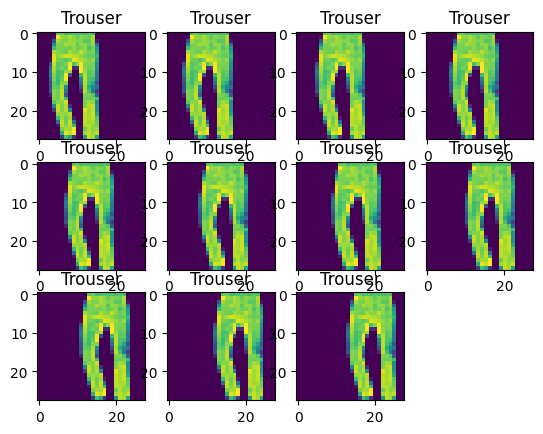

<Axes: title={'center': 'probability of each class for variaous translations'}>

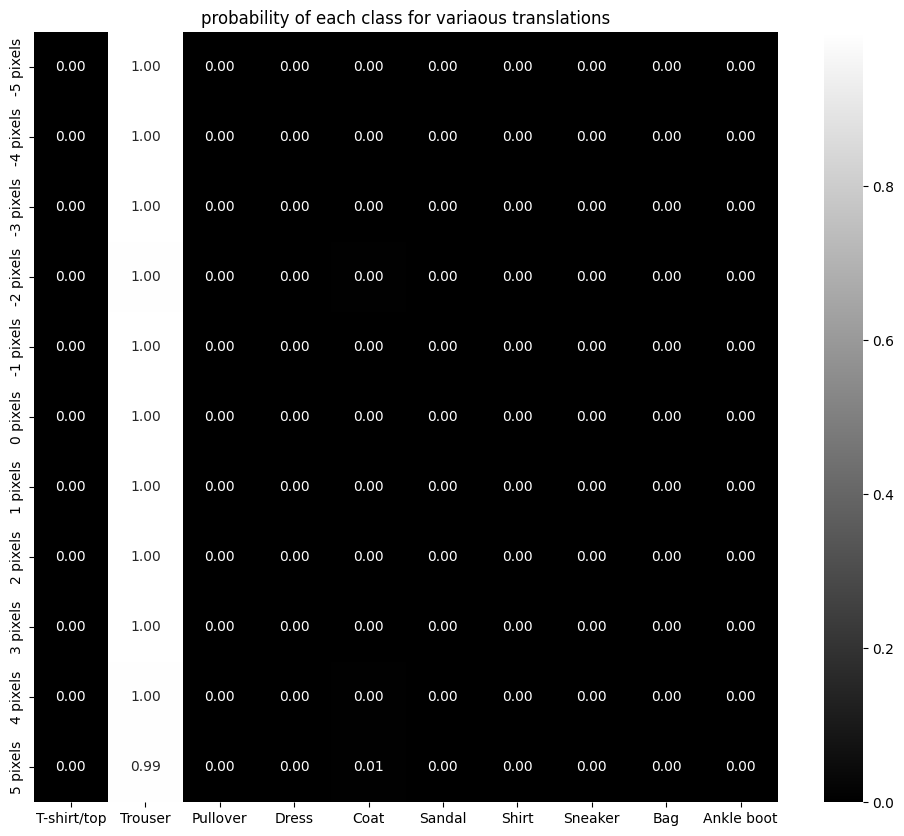

In [41]:
# 7. 可视化
preds = []
ix = 24300
img = tr_images[ix]/255.0
img = img.view(28,28)
total = 6-(-5)
for i, px in enumerate(range(-5,6)):
  row = total//4
  col = total%4
  plt.subplot(row+1, col+1, i+1)
  img2 = np.roll(img, px, axis=1)
  img3 = torch.tensor(img2).view(-1,1,28,28).to(device)
  np_output = model(img3).cpu().detach().numpy()
  pred = np.exp(np_output)/np.sum(np.exp(np_output))
  preds.append(pred)
  plt.imshow(img2)
  plt.title(fmnist.classes[pred[0].argmax()])
plt.show()

# 验证模型效果，可视化
fig, ax = plt.subplots(1,1,figsize=(12,10))
plt.title("probability of each class for variaous translations")
sns.heatmap(np.array(preds).reshape(11,10), annot=True, ax=ax, fmt='.2f', xticklabels=fmnist.classes, yticklabels=[str(i)+str(' pixels') for i in range(-5,6)], cmap='gray')

## 4.6 特征结果的可视化
滤波器功能强大的原理

1. 滤波器到底学习了什么，使得CNN能够实现对包含X和O的图像进行正确分类。
2. 理解全连接层，了解他们的激活情况

#### 4.6.1 上面模型第一组conv滤波器的输出

torch.Size([28, 28])
torch.uint8


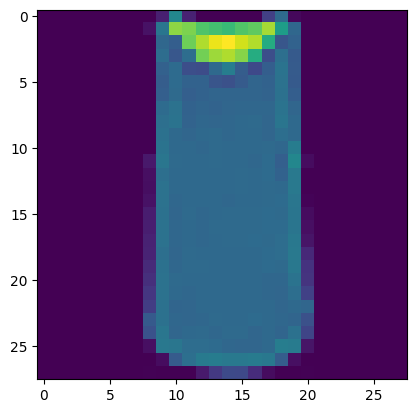

len(children) = 1


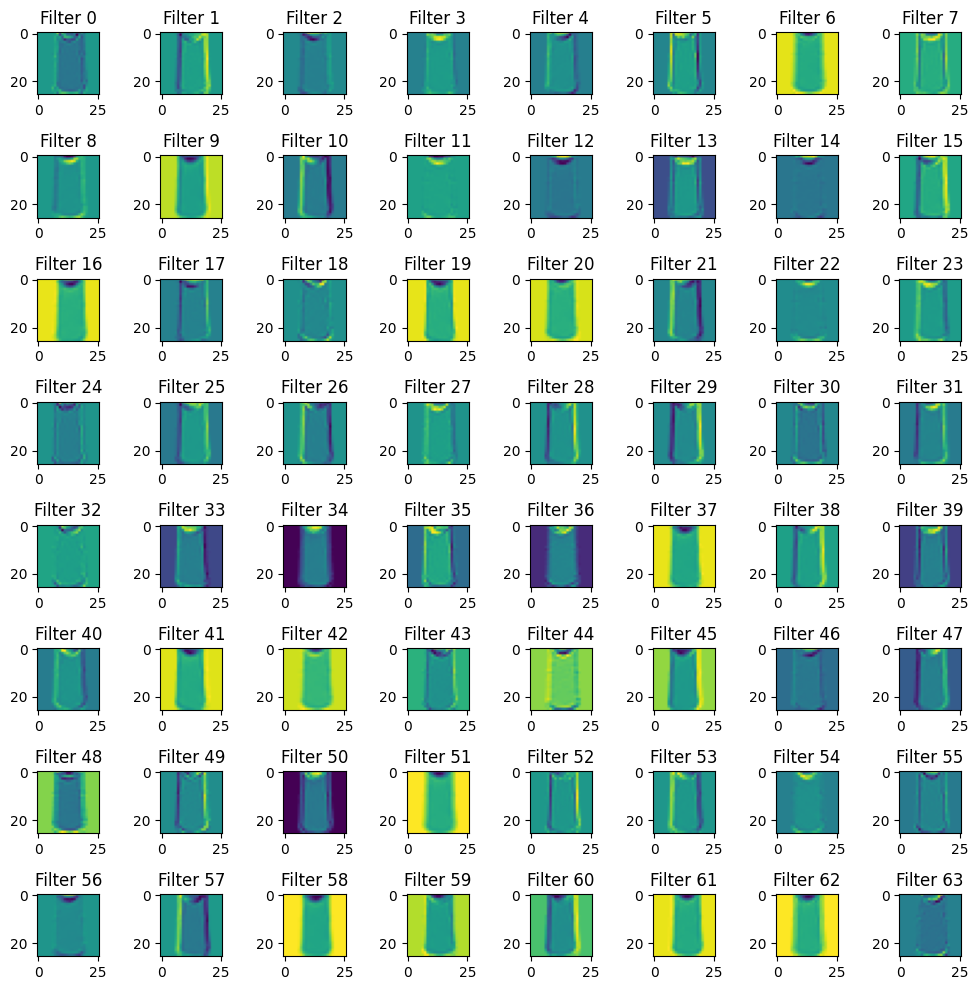

In [57]:
# 获取一个图像
im, c = trn_dl.dataset[2]

print(im.shape)
print(im.dtype)
plt.imshow(im.cpu())
plt.show()

im = im.float() / 255.0
im = im.reshape((1, 1, 28, 28))
im = im.to(device)

# 图片传递给训练好的模型，获取第一层输出
children = list(model.children())[:1]
print(f'len(children) = {len(children)}')
first_layer = nn.Sequential(*children)
intermediate_output = first_layer(im)[0].detach()

# 绘制64个滤波器输出
fig, ax = plt.subplots(8,8,figsize=(10,10))
for ix, axis in enumerate(ax.flat):
  axis.set_title(f'Filter {str(ix)}')
  axis.imshow(intermediate_output[ix].cpu())
plt.tight_layout()
plt.show()

#### 4.6.2 上面模型第二组conv滤波器的输出

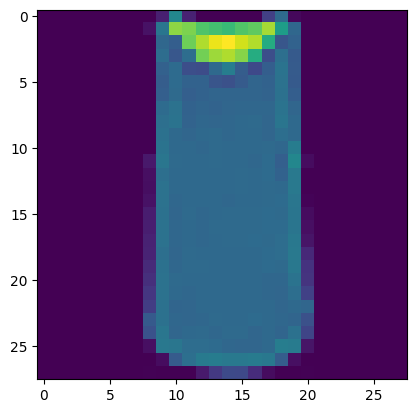

len(items) = 4


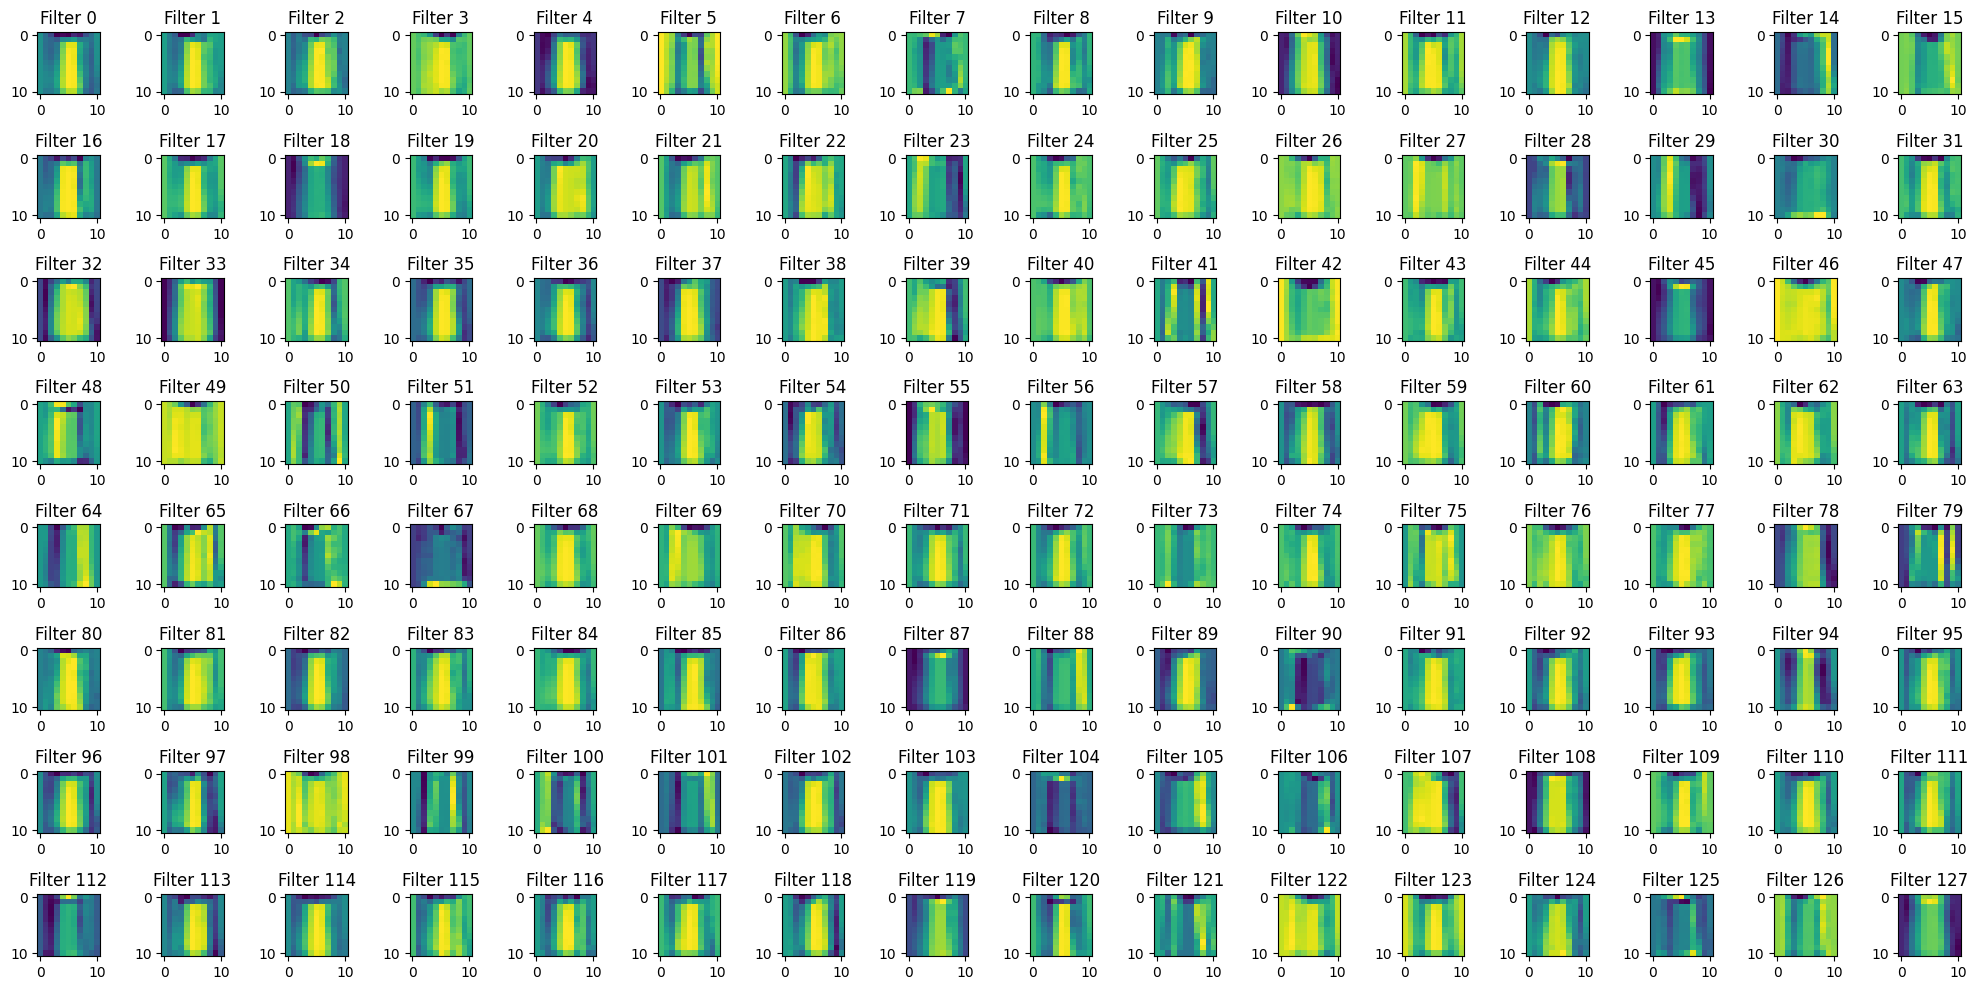

In [61]:
im, c = trn_dl.dataset[2]

plt.imshow(im.cpu())
plt.show()

im = im.float()/255.0
im = im.reshape((1,1,28,28))
im =im.to(device)

# 前三层
children = list(model.children())[:4]
print(f'len(items) = {len(children)}')
second_layer = nn.Sequential(*children)
second_intermediate_output = second_layer(im)[0].detach()

# 绘制64个滤波器输出
fig, ax = plt.subplots(8,16,figsize=(20,10))
for ix, axis in enumerate(ax.flat):
  axis.set_title(f'Filter {str(ix)}')
  axis.imshow(second_intermediate_output[ix].cpu())
plt.tight_layout()
plt.show()

#### 4.6.3 上面模型扁平层(全连接层) Flatten输出

torch.Size([60000, 28, 28])
x2 shape torch.Size([6000, 1, 28, 28])
torch.Size([6000, 3200])


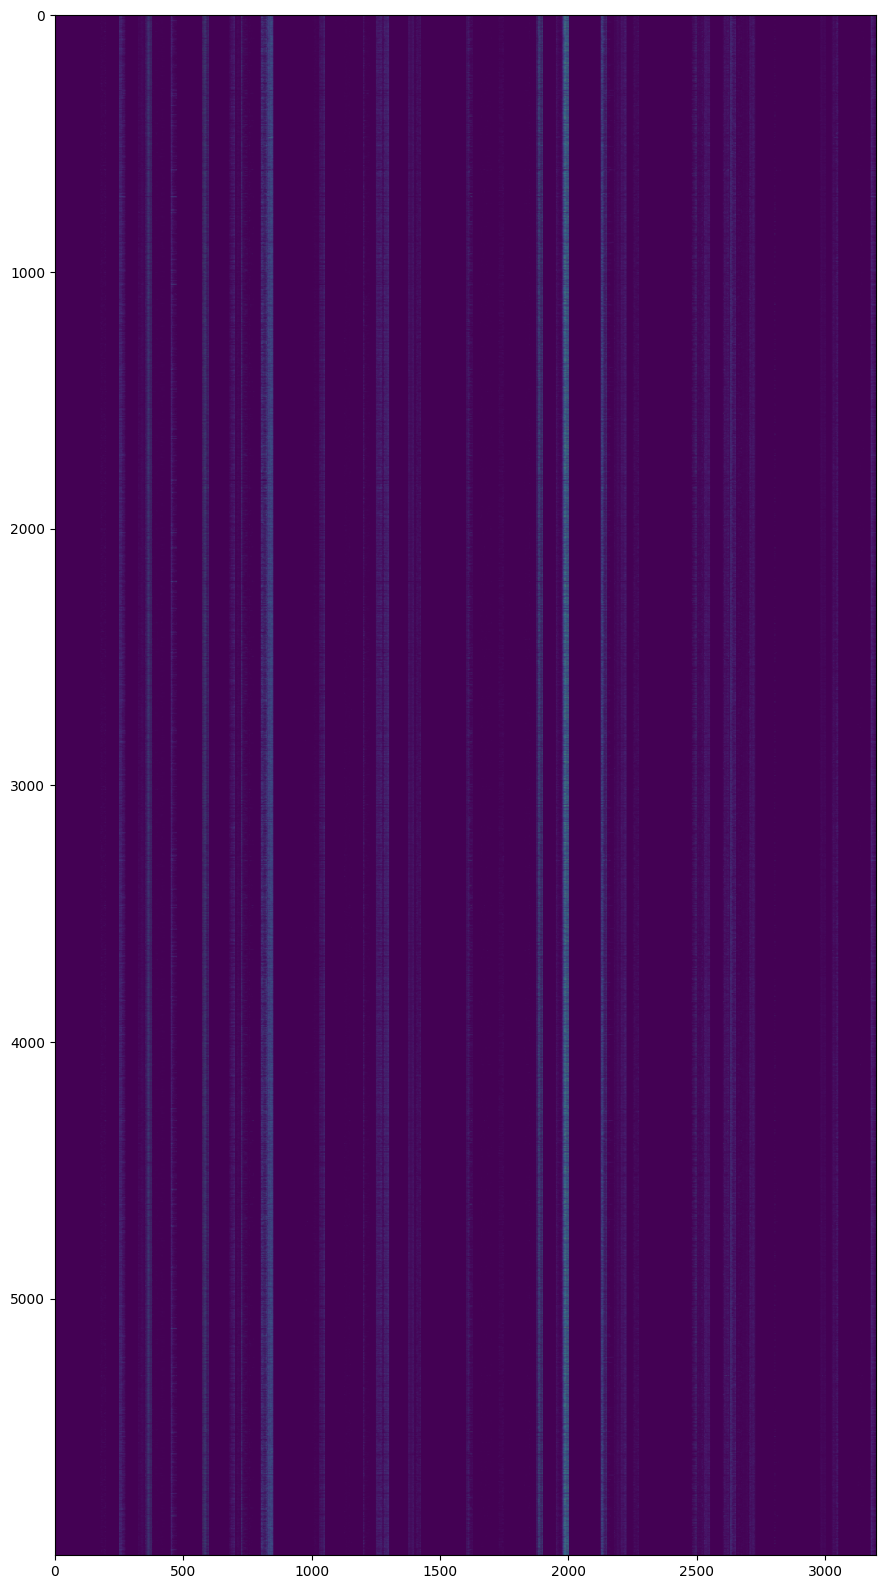

In [110]:
#train = FMNISTDataset(tr_images, tr_targets, aug=aug)
print(tr_images.shape)
x2 = tr_images[tr_targets==1]
len(x2)

x2 = x2.view(len(x2),1,28,28)

print(f"x2 shape {x2.shape}")

x2 = x2.float()
x2 =x2.to(device)

# 前三层
flatten_layer = nn.Sequential(*list(model.children())[:7])
flatten_layer_output = flatten_layer(x2).detach()

print(flatten_layer_output.shape)


plt.figure(figsize=(100,20))
plt.imshow(flatten_layer_output.cpu())
plt.show()



## 4.7 构建对真实图像进行分类的CNN
猫狗分类，终于到你了兄弟！

数据集来自kaggle: https://www.kaggle.com/datasets/tongpython/cat-and-dog

准确率 88%左右

In [138]:
!pip install -q kaggle
!pip install opencv-python
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


上传kaggle.json

In [ ]:
from google.colab import files
print("upload kaggle.json")
files.upload()

移动kaggle.json, 下载猫狗数据


In [119]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/trai

准备工作

In [136]:
!ls /content/training_set/
!ls /content/training_set/training_set
!ls /content/test_set/test_set


training_set
cats  dogs
cats  dogs


fpaths = ['/content/training_set/training_set/dogs/dog.715.jpg', '/content/training_set/training_set/cats/cat.2815.jpg', '/content/training_set/training_set/cats/cat.3989.jpg', '/content/training_set/training_set/dogs/dog.1103.jpg', '/content/training_set/training_set/dogs/dog.1487.jpg', '/content/training_set/training_set/cats/cat.1184.jpg', '/content/training_set/training_set/cats/cat.672.jpg', '/content/training_set/training_set/dogs/dog.1885.jpg', '/content/training_set/training_set/cats/cat.237.jpg', '/content/training_set/training_set/cats/cat.2453.jpg', '/content/training_set/training_set/cats/cat.2389.jpg', '/content/training_set/training_set/cats/cat.1594.jpg', '/content/training_set/training_set/dogs/dog.1002.jpg', '/content/training_set/training_set/cats/cat.3434.jpg', '/content/training_set/training_set/dogs/dog.1121.jpg', '/content/training_set/training_set/cats/cat.3639.jpg', '/content/training_set/training_set/dogs/dog.3439.jpg', '/content/training_set/training_set/dogs/

/tmp/ipython-input-167-164672048.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(f"torch.tensor(im/255.0).permute(2,0,1) shape {torch.tensor(im/255.0).permute(2,0,1).shape}")


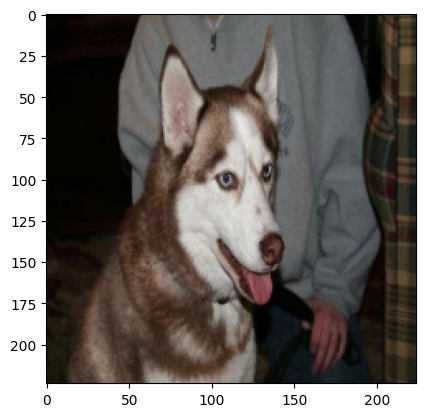

In [167]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from glob import glob

from random import shuffle, seed; seed(10);

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD, Adam
from torchvision import transforms, models, datasets

from torchsummary import summary

train_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available else 'cpu'

# 构建一个获取数据的类
class cats_dogs(Dataset):
  def __init__(self, folder):
    cats = glob(f'{folder}/cats/*.jpg' )
    dogs = glob(f'{folder}/dogs/*.jpg' )
    self.fpaths = cats + dogs
    shuffle(self.fpaths)
    print(f'fpaths = {self.fpaths}')
    self.targets = [fpath.split('/')[-1].startswith('dog') for fpath in self.fpaths]
    print(f'targets = {self.targets}')
  def __getitem__(self, ix):
    f = self.fpaths[ix]
    targets = self.targets[ix]
    # im shape (height, weight, channel)
    im = cv2.imread(f)[:,:,::-1]
    im = cv2.resize(im, (224,224))
    # convert to (channel, height, weight)
    x = torch.tensor(im/255.0).permute(2,0,1).to(device).float() # 通道数放前面
    y = torch.tensor([targets]).float().to(device)
    return x, y
  def __len__(self):
    return len(self.fpaths)

# 展示一张图片
data = cats_dogs(train_data_dir)
im, label = data[200]
print(label)
print(f"torch.tensor(im/255.0).permute(2,0,1) shape {torch.tensor(im/255.0).permute(2,0,1).shape}")
print(im.shape)
# (channel, height, weight) ==> (height, weight, channel)
plt.imshow(im.permute(1,2,0).cpu())
plt.show()

定义模型

In [169]:
# 卷积 -> 激活 -> 归一化 -> 池化
def conv_layer(ni, no, kernel_size, stride=1):
  return nn.Sequential(
      nn.Conv2d(ni, no, kernel_size, stride),
      nn.ReLU(),
      nn.BatchNorm2d(no),
      nn.MaxPool2d(2),
  )

def get_model():
  model = nn.Sequential(
      # (n, 3, 224, 224) -> (n, 64, 111, 111)
      conv_layer(3, 64, 3),
      # (n, 64, 111, 111) -> (n, 512, 54, 54)
      conv_layer(64, 512, 3),
      # (n, 512, 54, 54) -> (n, 512, 26, 26)
      conv_layer(512, 512, 3),
      # (n, 512, 26, 26) -> (n, 512, 12, 12)
      conv_layer(512, 512, 3),
      # (n, 512, 12, 12) -> (n, 512, 5, 5)
      conv_layer(512, 512, 3),
      # (n, 512, 5, 5) -> (n, 512, 1, 1)
      conv_layer(512, 512, 3),

      #(n, 512, 1, 1) => #(n, 512)
      nn.Flatten(),

      ##(n, 512) => (n, 1)
      nn.Linear(512, 1),
      nn.Sigmoid(),
  ).to(device)
  loss_fn = nn.BCELoss()
  optimizer = Adam(model.parameters(), lr=1e-3)
  return model, loss_fn, optimizer

model, loss_fn, optimizer = get_model()
summary(model, input_size=(3,224,224))

#获取数据
#drop_last=True: 忽略最后一批数据，因为可能和其他批大小不一样
def get_data():
  train = cats_dogs(train_data_dir)
  # drop_last=True忽略最后一批数据，因为可能和其他批大小不一样
  trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last=True)
  val = cats_dogs(test_data_dir)
  val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last=True)
  return trn_dl, val_dl

# 训练
# 训练批次
def train_batch(x, y, model, optimizer, loss_fn):
  model.train()
  prediction = model(x)
  batch_loss = loss_fn(prediction, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

# 计算准确度和验证损失的函数
@torch.no_grad()
def accuracy(x, y, model):
  model.eval()
  prediction = model(x)
  is_correct = (prediction > 0.5) == y # (prediction > 0.5) 转换为 True, False
  return is_correct.cpu().numpy().tolist()

@torch.no_grad()
def val_loss(x, y, model, loss_fn):
  model.eval()
  prediction = model(x)
  val_loss = loss_fn(prediction, y)
  return val_loss.item()


trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
  print(f"epoch {epoch}")
  train_epoch_losses, train_epoch_accuracies = [], []
  val_epoch_losses, val_epoch_accuracies = [], []

  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)
    train_epoch_losses.append(batch_loss)
  train_epoch_loss = np.array(train_epoch_losses).mean()

  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    is_correct = accuracy(x, y, model)
    train_epoch_accuracies.extend(is_correct)
  train_epoch_accuracy = np.mean(train_epoch_accuracies)

  for ix, batch in enumerate(iter(val_dl)):
    x, y = batch
    val_is_correct = accuracy(x, y, model)
    val_epoch_accuracies.extend(val_is_correct)
    validation_loss = val_loss(x, y, model, loss_fn)
  val_epoch_accuracy = np.mean(val_epoch_accuracies)

  train_losses.append(train_epoch_loss)
  train_accuracies.append(train_epoch_accuracy)
  val_losses.append(validation_loss)
  val_accuracies.append(val_epoch_accuracy)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 222, 222]           1,792
              ReLU-2         [-1, 64, 222, 222]               0
       BatchNorm2d-3         [-1, 64, 222, 222]             128
         MaxPool2d-4         [-1, 64, 111, 111]               0
            Conv2d-5        [-1, 512, 109, 109]         295,424
              ReLU-6        [-1, 512, 109, 109]               0
       BatchNorm2d-7        [-1, 512, 109, 109]           1,024
         MaxPool2d-8          [-1, 512, 54, 54]               0
            Conv2d-9          [-1, 512, 52, 52]       2,359,808
             ReLU-10          [-1, 512, 52, 52]               0
      BatchNorm2d-11          [-1, 512, 52, 52]           1,024
        MaxPool2d-12          [-1, 512, 26, 26]               0
           Conv2d-13          [-1, 512, 24, 24]       2,359,808
             ReLU-14          [-1, 512,

可视化

/tmp/ipython-input-171-3562084019.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


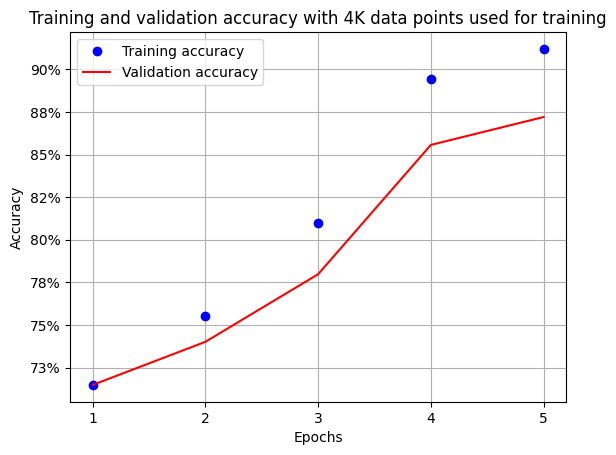

In [171]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with 4K data points used for training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.ylim(0.8,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()